# Práctica: Ensamble methods (Stacking)

 # Importar librerías necesarias para la aplicación del algoritmo

es necesario instalar xgboost

```
pip install xgboost
```


In [1]:
!pip install xgboost

In [2]:
#Importing datasets from the sklearn library.
from sklearn import datasets

#Importing different classifiers or weak learners
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost

#Importing the meta-classifier
from sklearn.linear_model import LogisticRegression

#Importing the ensamble method
from sklearn.ensemble import StackingClassifier

#Importing the pandas and matplotlib.pyplot libraries for data manipulation and visualization.
import pandas as pd
import matplotlib.pyplot as plt

#Importing k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Acerca del Dataset
El conjunto de datos etiquetados pertenece a la base de datos "Breast Cancer Wisconsin (Diagnostic) Database" disponible gratuitamente en la biblioteca sklearn de python; para más detalles, véase:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

- Número de muestras: 569
- Número de características: 30 atributos numéricos predictivos
- Número de clases: 2, las cuales corresponden a resultados negativos/benignos (Benign) y positivos/malignos (Malignant).

Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (AAF) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen. Se calculan diez características de valor real para cada núcleo celular. La media (mean), el error estándar (standard error) y el "peor" o mayor (media de los tres mayores valores) de estas características se calcularon para cada imagen, lo que dio como resultado 30 características. Por ejemplo, las medidas del radio corresponden al "radio medio" (mean radius), el "error estándar del radio" (standard error of the radius) y el "peor radio" (worst radius). Todos los valores de las características se recodifican con cuatro dígitos significativos.

Tomado de: https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/

Práctica adaptada por: Keren López Córdoba (kerenlopezcordoba@outlook.es)

# Objetivo de la práctica

<img src="img/img1.png" width="600">

Utilizaremos la técnica de Stacking con varios estimadores (aprendíces débiles)
como "decision tree", "random forest", "k-neighbors" y "XGBoost", esto con el fin de crear un modelo que tenga una alta precisión al momento de clasificar si una masa es maligna o benigna. Para ello, nuestro meta-clasificador o quien combinará las predicciones de todos los modelos anteriores será una regresión logística (logistic regression).

In [3]:
# Import dataset
df = datasets.load_breast_cancer()

# Vista preliminar de los datos

In [4]:
#Retrieve the column names (or keys) of the dataset.
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
#Getting the posible values of the target variable in the dataset.
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
#Creating a dataframe with the data of the dataframe
X = pd.DataFrame(columns = df.feature_names, data = df.data)

In [7]:
#Assigning the target value
y = df.target

In [8]:
#Shows the first five rows of the dataframe.
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
#Searching for null values in the dataframe
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

No se evidencian valores nulos.

In [10]:
#Returns a tuple representing the dimensions of the dataframe. The first element of the tuple is the number of rows and the second element is the number of columns.
df.target.shape

(569,)

In [11]:
'''Creating a dictionary called `target` with a key-value pair. The key is 'target' and the value is 'df.target'.
This is a way to store the `df.target` data under the key `'target'` for easy access and reference later in the code.'''
target = {'target' : df.target}

In [12]:
#Creating a dataframe with the target values.
y = pd.DataFrame(data = target)

Conteo de objetos por clase:
target
1         357
0         212
Name: count, dtype: int64

El tipo de este objeto es:  <class 'pandas.core.series.Series'> 



C:\Users\16079220\AppData\Local\Temp\ipykernel_26116\2245136666.py:6: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  conteo_de_ejemplos_por_clase.plot(kind='pie',


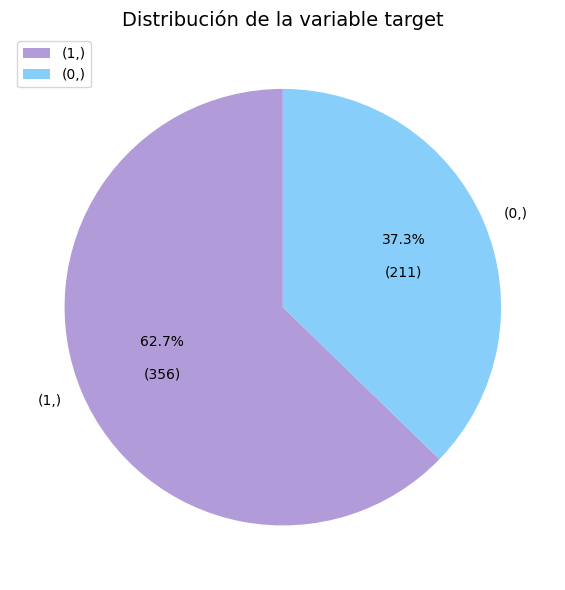

In [13]:
#Pie chart of target variable
conteo_de_ejemplos_por_clase = y.value_counts()
print('Conteo de objetos por clase:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El tipo de este objeto es: ', type(conteo_de_ejemplos_por_clase),'\n')

conteo_de_ejemplos_por_clase.plot(kind='pie',
                                    figsize=(6,6),
                                    autopct=lambda pct: '{:.1f}%\n\n({:d})'.format(pct, int(pct/100.*conteo_de_ejemplos_por_clase.sum())),
                                    startangle=90,
                                    fontsize=10,
                                    colors=['#B19CD9', '#87CEFA'],
                                    cmap='Pastel1')
titulo = 'Distribución de la variable target'
plt.title(titulo, fontsize=14)
plt.ylabel('')
labels = conteo_de_ejemplos_por_clase.index.tolist()
plt.legend(loc='upper left', labels=labels)
plt.tight_layout()
plt.show()

Los datos lucen balanceados, por lo que escogeremos al accuracy como nuestra métrica.

Aquí...
*   1 - Benign
*   0 - Malignant




In [14]:
#Assigning the value of the 'target' key from the dictionary `y` to the variable `y`.
y = y['target']

# Estadística básicas de tendencia central para variables numéricas

In [15]:
'''It provides descriptive statistics of a dataframe.
It includes count, mean, standard deviation, minimum, maximum, and quartile values for each column in the dataframe.
This method is useful for getting a quick overview of the data and identifying any potential issues such as missing values or outliers.'''
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Conclusiones:


1. Los datos NO requieren ningún tratamiento previo.
2. El EDA no es tan necesario así que pasaremos directamente a la parte de modelado




#K fold cross Validation

In [16]:
#Initialize weak learners
dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn =  KNeighborsClassifier()

In [17]:
#Calculating the accuracy score of each model individually using k-fold cross validation.
clf = [dtc,rfc,knn]
for algo in clf:
    score = cross_val_score( algo,X,y,cv = 4,scoring = 'accuracy')
    print("The accuracy score of {} is:".format(algo),score.mean())


The accuracy score of DecisionTreeClassifier() is: 0.9280015758888999
The accuracy score of RandomForestClassifier() is: 0.9596178469417906
The accuracy score of KNeighborsClassifier() is: 0.9279892642568699


# Stacking

In [18]:
dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn =  KNeighborsClassifier()
clf = [('dtc',dtc),('rfc',rfc),('knn',knn)] #list of (str, estimator)

In [19]:
'''Creating a logistic regression model (`lr`) and a stacking classifier model (`stack_model`).
The stacking classifier is an ensemble learning method that combines multiple base
classifiers (`clf`) and uses a final estimator (`lr`) to make predictions.'''
lr = LogisticRegression()
stack_model = StackingClassifier( estimators = clf,final_estimator = lr)
score = cross_val_score(stack_model,X,y,cv = 10,scoring = 'accuracy')
print("The accuracy score of is:",score.mean())

The accuracy score of is: 0.9578634085213033


# Ejercicio

Agregue el algoritmo XGBoost como un aprendiz débil más a la lista. ¿Mejora el accuracy del método de ensamble? Compare el accuracy obtenido con el valor que arroja el modelo por sí solo.